# **Chapter 3**
This notebook walkthrough the cleaning and exploring process of our arabic tweets dataset

## Cleaning and EDA

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from IPython.display import display

import utils


FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf")
path = './labeld_dataset/'

In [2]:
# sys.path.insert(0, path)

In [3]:
bolivard = pd.read_csv(path+'bolivard.csv', header=0)
winter = pd.read_csv(path+'winter_wounder_land.csv', header=None)
shm = pd.read_csv(path+'labeled shm3.csv', header=0)

In [4]:
display(shm.loc[:, shm.columns != 'user-name'].head(n=3))
display(bolivard.head(n=3))
display(winter.head(n=3))

,Unnamed: 0,date,label,tweet,loca,fv_count,rt-count,Event name
0,31,2019-11-06 15:43:30,2.0,ابو ناصر طلبتك ...المفروض تكون ليلة لك كليلة ع...,جدة,0.0,0.0,SHM
1,32,2019-11-06 15:43:07,2.0,ليلة سهم على اي قناه عرضوها امس؟,NaN,0.0,0.0,SHM
2,108,2019-11-06 15:01:00,2.0,#ليلة_سهم\nالليلة بشكل عام جميلة .. بس الكراسي...,الرياض,0.0,0.0,SHM


,date,label,text,event
0,2019-10-19 15:06:03,0,#بوليفارد_الرياض وصار للعوائل فقط😂😂,carnival_bolivard
1,2019-10-19 15:05:17,1,@RiyadhSeason ودنا #بوليفارد_الرياض يكون متواج...,carnival_bolivard
2,2019-10-19 15:02:51,1,أغلبنا تضايق من زحمة #بوليفارد_الرياض والمناظر...,carnival_bolivard


,0,1,2
0,2019-10-26 20:14:04,اللعبة هذي في #ونتر_وندرلاند اليوم\n\nاخيرا ج...,NaN
1,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1
2,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2


In [5]:
winter.columns = ['date', 'text', 'label']
print(shm.columns)

Index(['Unnamed: 0', 'date', 'label', 'tweet', 'user-name', 'loca', 'fv_count',
       'rt-count', 'Event name'],
      dtype='object')


In [6]:

shm.drop('Unnamed: 0', inplace=True, axis=1)
shm.rename(columns={'tweet': 'text'}, inplace=True)


In [7]:
print(shm.columns)
print(winter.columns)

Index(['date', 'label', 'text', 'user-name', 'loca', 'fv_count', 'rt-count',
       'Event name'],
      dtype='object')
Index(['date', 'text', 'label'], dtype='object')


In [8]:
winter['event'] = 'winter_wonder_land'
shm['event'] = 'shm'
shm.drop('Event name', inplace=True, axis=1)

In [9]:
print(f'Shm event labeld tweets {shm.label.notna().sum()}\nwinter event labeld tweets {winter.label.notna().sum()}\nbolivard event labeld tweets {bolivard.label.notna().sum()}')

Shm event labeld tweets 1548
winter event labeld tweets 1480
bolivard event labeld tweets 2001


In [10]:
shm = shm[shm.label.notna()]

winter = winter[winter.label.notna()]



In [11]:
print(shm.label.value_counts())

print('\n', winter.label.value_counts())

print('\n',bolivard.label.value_counts())

1.0    1387
0.0     128
2.0      33
Name: label, dtype: int64

 1    703
2    490
0    285
       2
Name: label, dtype: int64

 1    1240
0     533
2     228
Name: label, dtype: int64


In [12]:
winter = winter[winter.label != ' ']

In [13]:
shm.label = shm.label.astype('int64')

In [14]:
print(shm.shape)
print(winter.shape)
print(bolivard.shape)

(1548, 8)
(1478, 4)
(2001, 4)


In [15]:
merged = pd.concat([winter, bolivard, shm])
merged.reset_index(drop=True, inplace=True)

In [16]:
display(merged.head(n=15))
print(merged.shape)

,date,text,label,event,user-name,loca,fv_count,rt-count
0,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1,winter_wonder_land,NaN,NaN,NaN,NaN
1,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2,winter_wonder_land,NaN,NaN,NaN,NaN
2,2019-10-26 20:09:44,حد يعرف سعر الالعاب في ونتر وندر لاند ؟!!\n #م...,2,winter_wonder_land,NaN,NaN,NaN,NaN
3,2019-10-26 20:08:12,@KAldeehani @MQA707 لا صح اسمها ونتر وندرلاند,2,winter_wonder_land,NaN,NaN,NaN,NaN
4,2019-10-26 20:05:38,@Turki_alalshikh اليوم زرت #ونتر_وندرلاند مع ا...,1,winter_wonder_land,NaN,NaN,NaN,NaN
5,2019-10-26 20:04:07,تدرين ليه المطر يشتاق لك يالرياض\nمن بين كل ال...,2,winter_wonder_land,NaN,NaN,NaN,NaN
6,2019-10-26 20:03:19,#موسم_الرياض فيه مطاعم ألعاب نارية النافورة، ا...,1,winter_wonder_land,NaN,NaN,NaN,NaN
7,2019-10-26 20:00:18,سينما على الأجواء المفتوحة وياسلام سلم🌃 \nمن ق...,1,winter_wonder_land,NaN,NaN,NaN,NaN
8,2019-10-26 19:48:44,نصيحتي له لا تشيلو ونتر وندرلاند خلو عندنا وحد...,1,winter_wonder_land,NaN,NaN,NaN,NaN
9,2019-10-26 19:48:20,ماطلبنا شي مستحيل ولا شي باذخ مثل #ونتر_وندرلا...,0,winter_wonder_land,NaN,NaN,NaN,NaN


(5027, 8)


In [17]:
merged.label  = pd.to_numeric(merged.label)

In [18]:
merged.label.value_counts()

1    3330
0     946
2     751
Name: label, dtype: int64

In [19]:
merged.label = merged['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [20]:
frequent_words = utils.frequent_words(merged.text, topk=25)
frequent_words

الرياض        2851
سهم           1646
موسم          1636
ونتر          1407
وندرلاند      1400
ليلة          1379
مسيره          947
بوليفارد       657
ليله           398
اليوم          239
مسيرة          206
شكرا           202
اروح           164
رابح           119
الزحمه         110
البوليفارد     103
الناس          103
جميل           101
صار            100
تركي           100
زحمه            98
الترفيه         95
احلى            95
اجمل            86
جبار            84
dtype: int64

In [84]:
pos_frequ_words = utils.frequent_words(merged[merged.label == 'Positive'].text, topk=25)
pos_frequ_words

الرياض        1898
سهم           1476
ليلة          1277
موسم          1116
وندرلاند       689
ونتر           689
مسيره          638
ليله           339
بوليفارد       333
شكرا           193
اليوم          172
مسيرة          169
رابح           116
اروح           105
احلى            92
جميل            90
صار             86
اجمل            83
عبدالمجيد       80
جبار            76
صقر             74
تركي            73
الترفيه         73
ماجد            68
البوليفارد      67
dtype: int64

In [85]:
neg_frequ_words = utils.frequent_words(merged[merged.label == 'Negative'].text, topk=25)
neg_frequ_words

الرياض        586
موسم          382
مسيره         267
ونتر          257
وندرلاند      255
بوليفارد      157
سهم           131
ليلة           77
زحمه           61
الزحمه         52
تنظيم          48
زحمة           47
ليله           45
الزحمة         36
الناس          34
اليوم          31
مسيرة          30
اروح           26
التنظيم        24
البوليفارد     21
الحين          20
مكان           19
يارب           19
وين            19
ونعم           19
dtype: int64

In [86]:
neu_frequ_words = utils.frequent_words(merged[merged.label == 'Neutral'].text, topk=25)
neu_frequ_words

ونتر          461
وندرلاند      456
الرياض        367
بوليفارد      167
موسم          138
مسيره          42
سهم            39
اليوم          36
الزحمه         35
اروح           33
زحمه           30
الناس          26
تذاكر          26
ليلة           25
الزحمة         24
الحين          20
زحمة           19
علي            18
الالعاب        17
راح            17
سباق           16
البوليفارد     15
الهلال         15
ليله           14
بالرياض        13
dtype: int64

In [87]:
combind = ' '.join(frequent_words.index)

In [88]:
data = arabic_reshaper.reshape(combind)
data = get_display(data)
data = data.split()
data.reverse()
print(data)

['ﺽﺎﻳﺮﻟﺍ', 'ﻢﻬﺳ', 'ﻢﺳﻮﻣ', 'ﺮﺘﻧﻭ', 'ﺪﻧﻻﺭﺪﻧﻭ', 'ﺔﻠﻴﻟ', 'ﻩﺮﻴﺴﻣ', 'ﺩﺭﺎﻔﻴﻟﻮﺑ', 'ﻪﻠﻴﻟ', 'ﻡﻮﻴﻟﺍ', 'ﺓﺮﻴﺴﻣ', 'ﺍﺮﻜﺷ', 'ﺡﻭﺭﺍ', 'ﺢﺑﺍﺭ', 'ﻪﻤﺣﺰﻟﺍ', 'ﺱﺎﻨﻟﺍ', 'ﺩﺭﺎﻔﻴﻟﻮﺒﻟﺍ', 'ﻞﻴﻤﺟ', 'ﻲﻛﺮﺗ', 'ﺭﺎﺻ', 'ﻪﻤﺣﺯ', 'ﻰﻠﺣﺍ', 'ﻪﻴﻓﺮﺘﻟﺍ', 'ﻞﻤﺟﺍ', 'ﺪﻴﺠﻤﻟﺍﺪﺒﻋ']


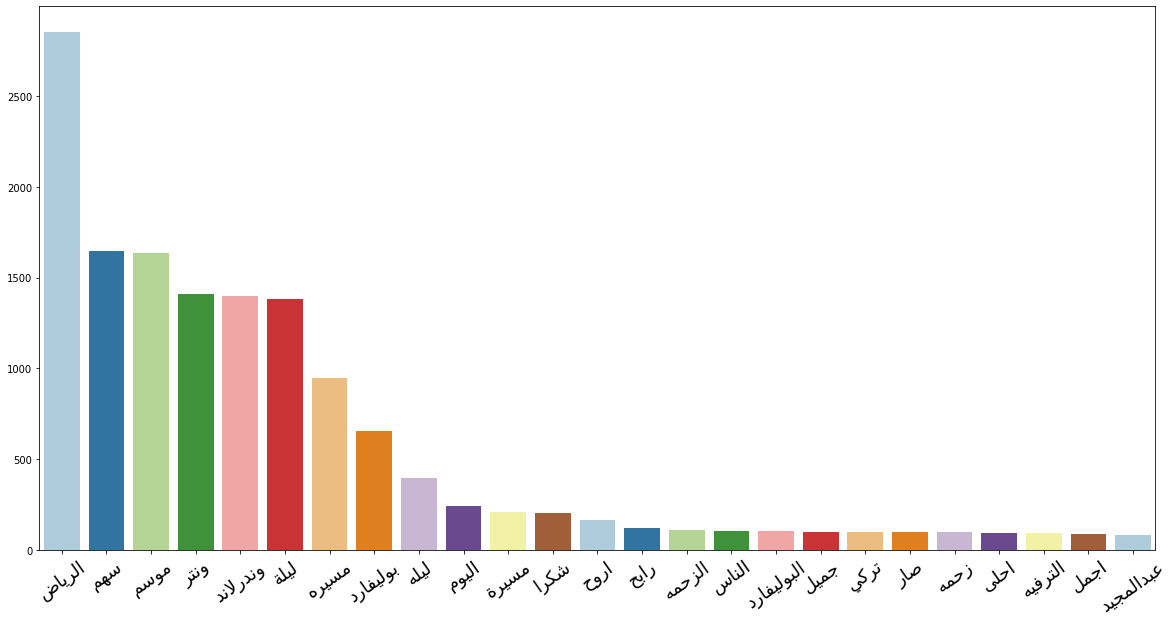

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data, frequent_words.values, palette="Paired")


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
                tick.label.set_rotation(35)
plt.savefig('term_frequency_all_data.png')
plt.show()

In [90]:
pos_emojies = utils.view_emojie(merged[merged.label == 'Positive'].text)
neg_emojies = utils.view_emojie(merged[merged.label == 'Negative'].text)

In [91]:
print(pos_emojies)
print(neg_emojies)

0         
1         
2         
3       🌃😏
4         
        ..
3325      
3326      
3327     😍
3328     💔
3329     💙
Length: 3330, dtype: object
0        
1        
2        
3        
4        
       ..
941      
942      
943      
944    🎼🖤
945      
Length: 946, dtype: object


In [92]:
pos_emojies = pos_emojies.replace(r'^\s*$', np.nan, regex=True) # replace empty space with nan .. 
pos_emojies.dropna(inplace=True)

neg_emojies = neg_emojies.replace(r'^\s*$', np.nan, regex=True) 
neg_emojies.dropna(inplace=True)

In [93]:
display(pos_emojies.value_counts())

display(neg_emojies.value_counts())

❤           117
😍            93
💔            76
💙            66
♥            47
           ... 
❤❤❤❤❤🌿        1
💙💙💙💙💙💙💙💙      1
😂🔥🔥           1
🎼💔            1
🙏🏻💛           1
Length: 963, dtype: int64

💔                     17
😂                     14
🙂                     10
😩                      6
😷                      6
                      ..
🔥🔥🔥🔥                   1
🤕                      1
🤣🤣🤣🤣                   1
😬😬                     1
🤢🤢🤢🤢🤢🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮     1
Length: 148, dtype: int64

In [94]:
pos_arr = []
neg_arr = []
for pos_row, neg_row in zip(pos_emojies, neg_emojies):
    for p_item, n_item  in zip(pos_row, neg_row):
        pos_arr.append(p_item)
        neg_arr.append(n_item)
     
pos_emojies = pd.Series(pos_arr)  
neg_emojies = pd.Series(neg_arr)      

In [95]:
display(pos_emojies.value_counts()[:10])
# display(pos_emojies.value_counts()[-7:])
pos_emojies.value_counts()[:10].to_csv('postive_emojies.csv', index=True)

😍    66
😭    43
❤    29
💔    24
😂    13
🥺    12
♥    10
💙     9
🔥     8
🏻     6
dtype: int64

In [96]:
display(neg_emojies.value_counts()[:10])
# display(neg_emojies.value_counts()[-7:])
neg_emojies.value_counts()[:10].to_csv('negative_emojies.csv', index=True)

💔    50
😂    30
😭    23
🙂    20
🏻    12
😡    10
😷    10
🤢     9
😩     8
❤     8
dtype: int64

In [97]:
cleaned = utils.get_arabic_words(merged.text, handle_emojies='remove', remove_repeated_char=True)

In [98]:
flagged = utils.repeated_char(merged.text)
flagged = flagged.replace(r'^\s*$', np.nan, regex=True)
flagged[flagged.notna()]

30                تفوووتك
46              ابداااااع
52      ههههههههههههههههه
62              انجاززززز
91            وكوووووووبه
              ...        
4973             اوووووفر
4977               عيبببب
4978               جددددا
5003       خلاااااااااااص
5022          مستحييييييل
Length: 671, dtype: object

In [99]:
# combind = ' '.join(cleaned)

In [100]:
# data = arabic_reshaper.reshape(combind)
# data = get_display(data)

In [101]:
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [102]:
# wordcloud.to_file('word_cloud_black.png')

In [103]:
# plt.figure(figsize = (25, 25)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout() 
# plt.show()

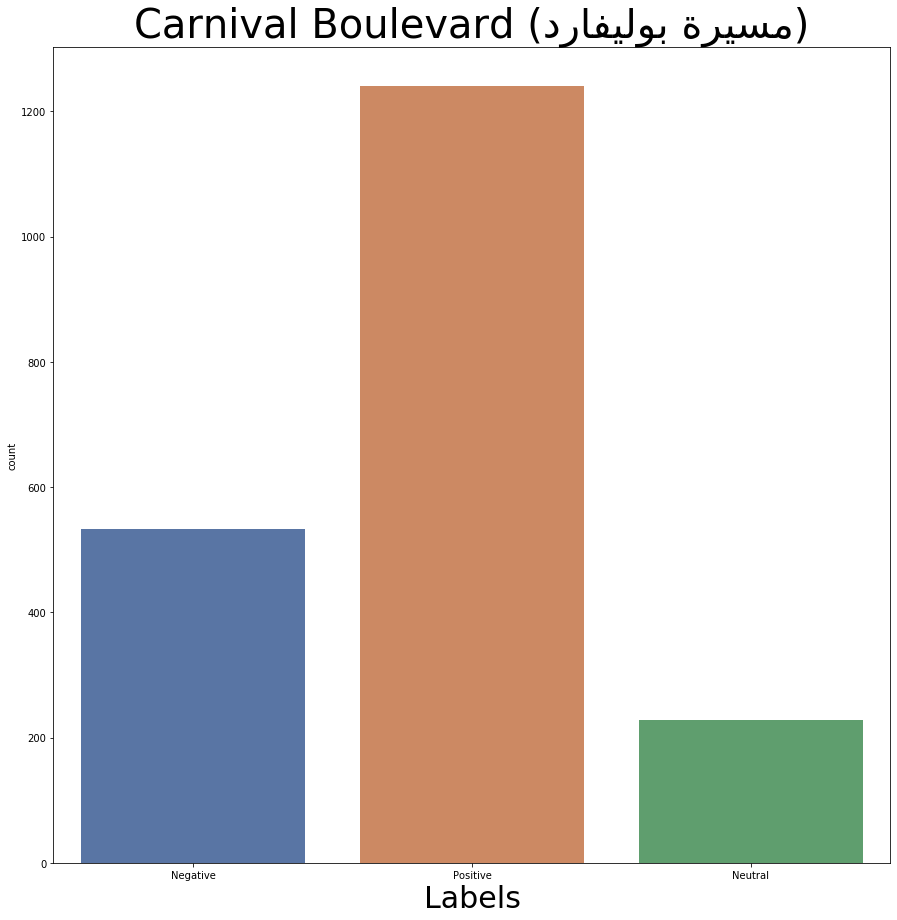

In [104]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(merged[merged.event=='carnival_bolivard'].label, palette='deep')
event = 'مسيرة بوليفارد'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'Carnival Boulevard ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('carnival_boulevard.png')

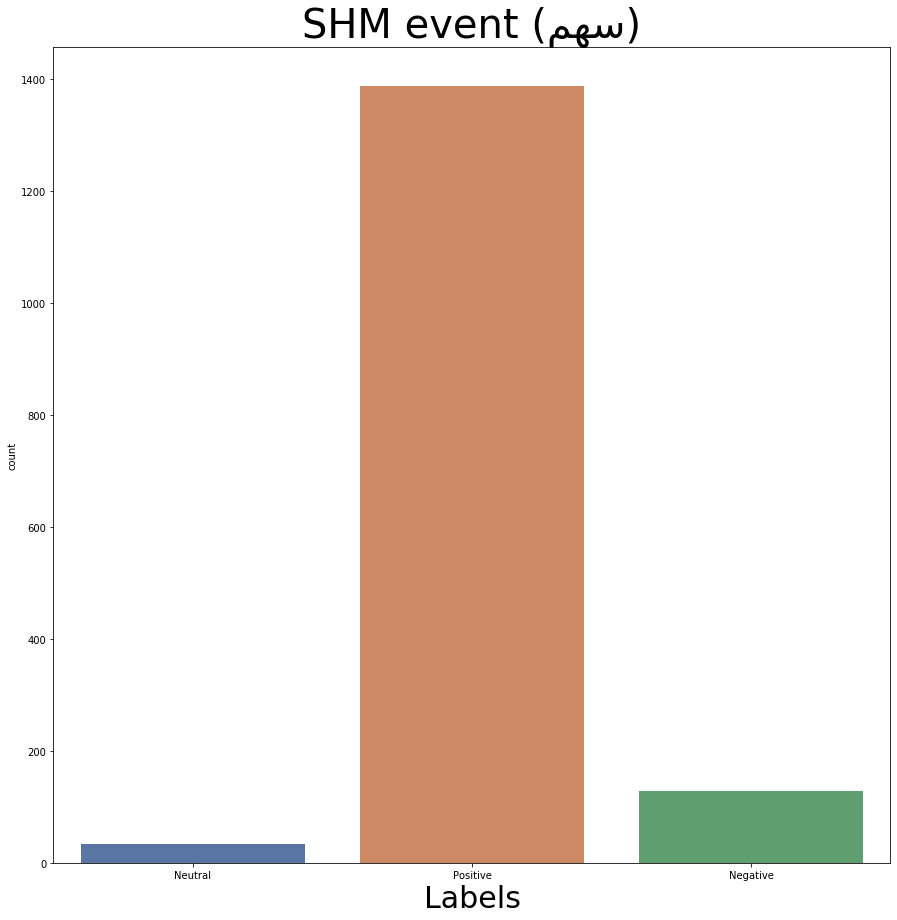

In [105]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='shm'].label, palette='deep')
event = 'سهم'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'SHM event ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('shm.png')

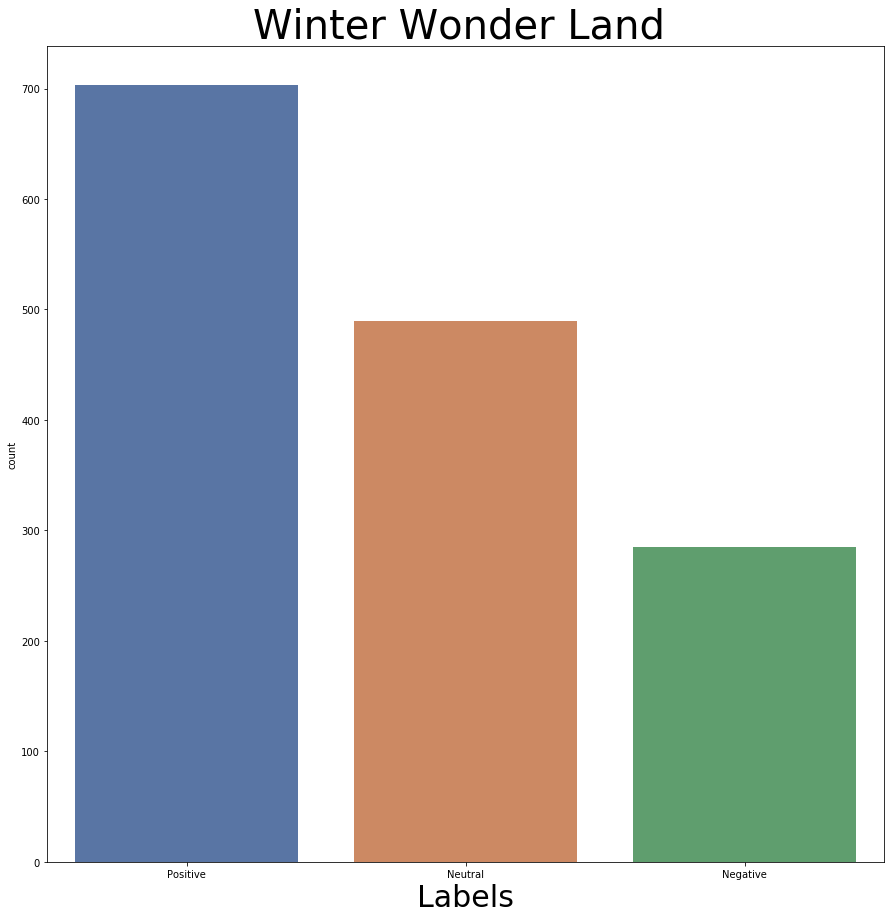

In [106]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='winter_wonder_land'].label, palette="deep")

plt.title('Winter Wonder Land ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('winter_wonder_land.png')

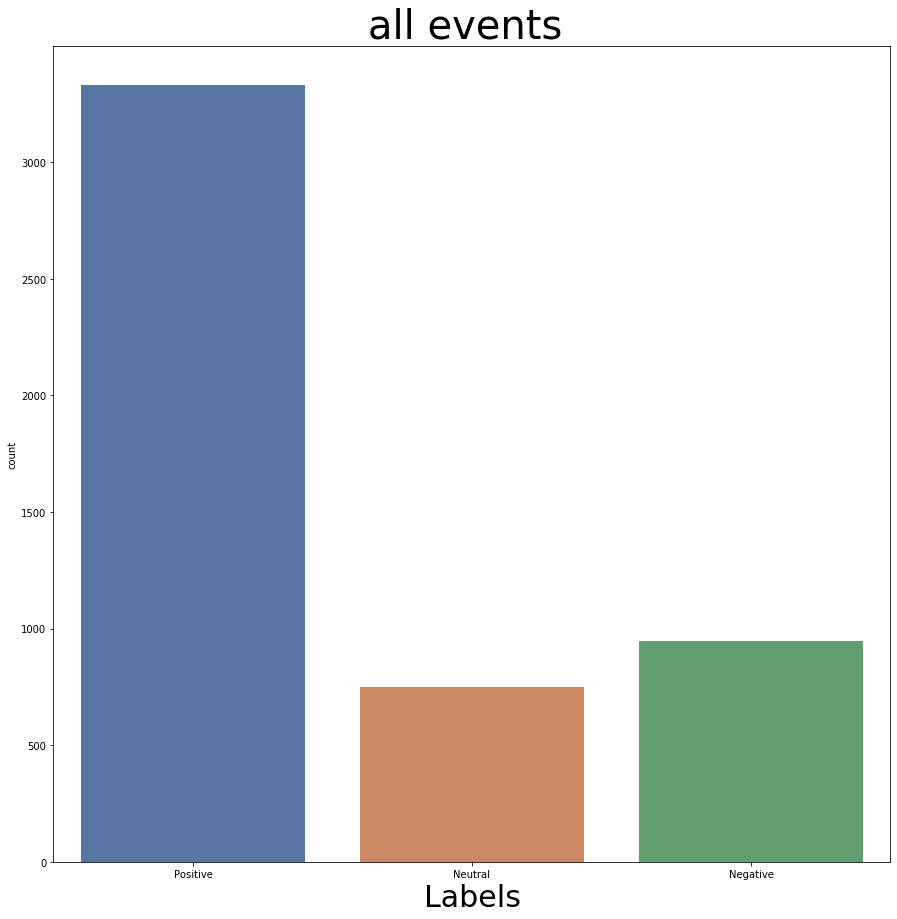

In [107]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged.label, palette='deep')
# event = 'سهم'
# event = arabic_reshaper.reshape(event)
# event = get_display(event)
plt.title('all events ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('events.png')

In [108]:
wonder_land = utils.get_arabic_words(winter.text, handle_emojies='remove', remove_repeated_char=False)
wonder_land = ' '.join(wonder_land)

In [109]:
data = arabic_reshaper.reshape(wonder_land)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

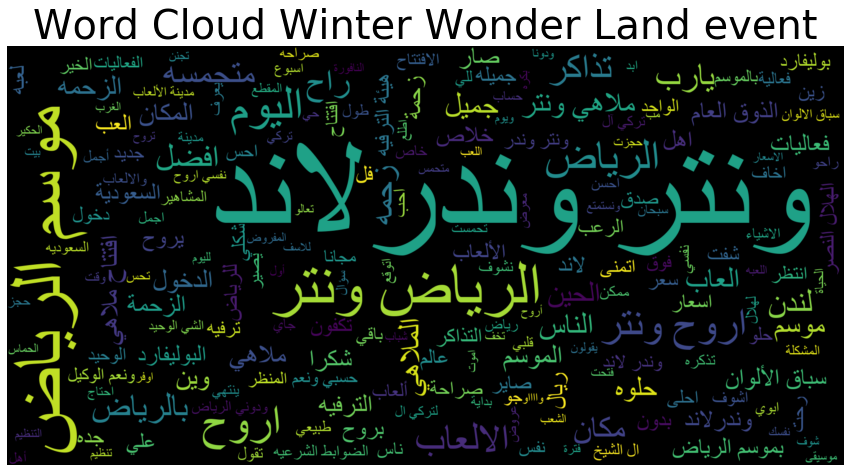

In [110]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title('Word Cloud Winter Wonder Land event', fontsize=40)
plt.axis("off") 
plt.savefig('Word_Cloud_Winter_Wonder_Land.png')
plt.show()

In [111]:
shm_event = utils.get_arabic_words(shm.text, handle_emojies='remove', remove_repeated_char=False)
shm_event = ' '.join(shm_event)

In [112]:
data = arabic_reshaper.reshape(shm_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

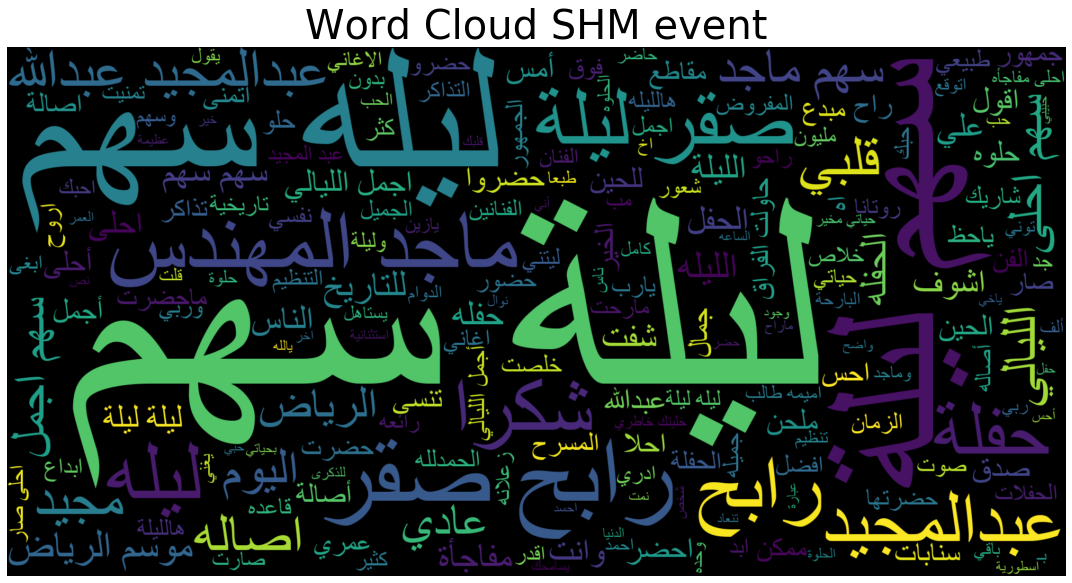

In [113]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud SHM event', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_SHM_Event.png')
plt.show()

In [114]:
bolivard_event = utils.get_arabic_words(bolivard.text, handle_emojies='remove', remove_repeated_char=False)
bolivard_event = ' '.join(bolivard_event)

In [115]:
data = arabic_reshaper.reshape(bolivard_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

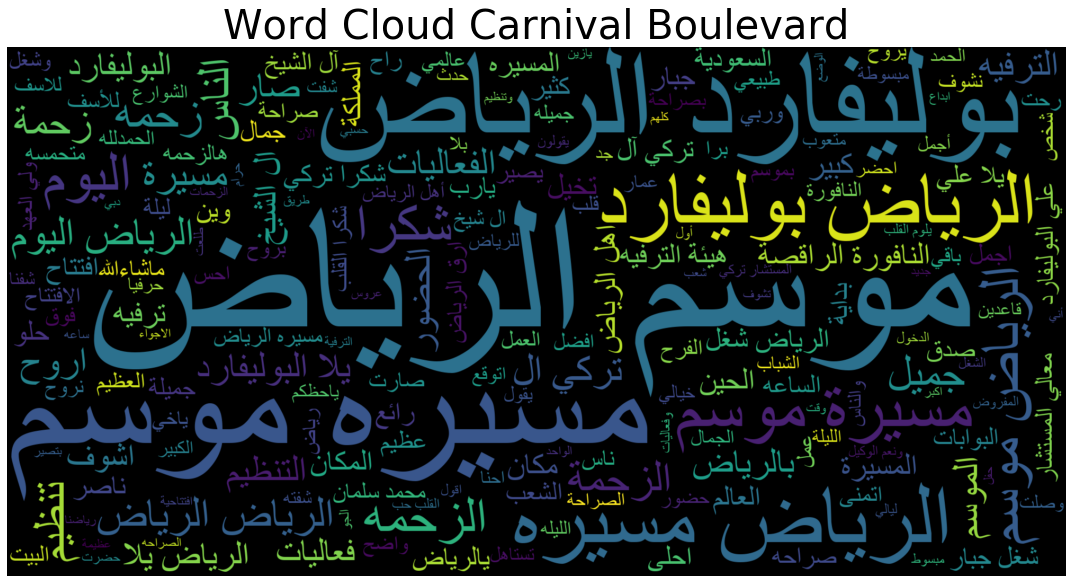

In [116]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud Carnival Boulevard', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_Carnival_Boulevard.png')
plt.show()

## Model Experiments 
* Use tfidf
* Use countVect
* Use lightLem..
* Use POS Tagging ( Java, or C++) 

In [2]:
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [27]:

# class StartingVerbExtractor(BaseEstimator, TransformerMixin):

#     def starting_verb(self, text):
#         sentence_list = nltk.sent_tokenize(text)
#         for sentence in sentence_list:
#             pos_tags = nltk.pos_tag(tokenize(sentence))
#             first_word, first_tag = pos_tags[0]
#             if first_tag in ['VB', 'VBP'] or first_word == 'RT':
#                 return True
#         return False

#     def fit(self, x, y=None):
#         return self

#     def transform(self, X):
#         X_tagged = pd.Series(X).apply(self.starting_verb)
#         return pd.DataFrame(X_tagged)


In [28]:
display(merged.head(2))

,date,text,label,event,user-name,loca,fv_count,rt-count
0,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,Positive,winter_wonder_land,NaN,NaN,NaN,NaN
1,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,Neutral,winter_wonder_land,NaN,NaN,NaN,NaN


In [29]:
X = merged.drop(columns=['date', 'label', 'event', 'user-name', 'loca', 'fv_count', 'rt-count'])
y = merged['label']

In [30]:
# clean text
X = utils.get_arabic_words(X.text, handle_emojies='remove', remove_repeated_char=True)

In [31]:
def tokenize(text, lemm=False):
    
    tokens = word_tokenize(text)
    if lemm:
        tokens = word_tokenize(text)
        lemmatizer = WordNetLemmatizer()
        clean_tokens = []
        for tok in tokens:
            clean_tok = lemmatizer.lemmatize(tok).lower().strip()
            clean_tokens.append(clean_tok)
        return clean_tokens

    return tokens

In [32]:
def build_model(use_tfidf=False):
    
    if use_tfidf: 
        pipeline = Pipeline([
                    ('vect', CountVectorizer(tokenizer=tokenize)),
                    ('tfidf', TfidfTransformer()),
                    ('clf', RandomForestClassifier(verbose=1))])
        parameters = {
        'vect__ngram_range': ((1, 1), (1, 2)),
        'vect__max_df': (0.5, 0.75, 1.0),
        'vect__max_features': (None, 5000, 10000),
        'clf__n_estimators': [50, 100],
        'clf__min_samples_split': [2, 3, 4],
        }
        
        model = GridSearchCV(pipeline, param_grid=parameters)
    else:
        steps = [('Count', CountVectorizer()), ('clf', RandomForestClassifier())]
        model = Pipeline(steps)
    
    return model

In [33]:
def display_results(cv, y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = build_model(use_tfidf=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

display_results(model, y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Us

Labels: ['Negative' 'Neutral' 'Positive']
Confusion Matrix:
 [[ 84  18 131]
 [ 20  44 131]
 [ 14  24 791]]
Accuracy: 0.7311058074781225

Best Parameters: {'clf__min_samples_split': 3, 'clf__n_estimators': 50, 'vect__max_df': 1.0, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [35]:
confusion_matrix(y_test, y_pred)

array([[ 84,  18, 131],
       [ 20,  44, 131],
       [ 14,  24, 791]])

In [37]:
accuracy_score(y_test, y_pred)

0.7311058074781225